##### Module import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tableone import TableOne
from forestplot import forestplot

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data import

In [3]:
print(os.getcwd())

c:\Users\Owner\Desktop\윤태준\고용패널\고용패널 파이썬 분석\2023_04_06_변수추가


In [4]:
df = pd.read_csv('2023_04_06_data_step.csv', encoding='cp949')
df.columns

Index(['pid', 'majorcat', 'province', 'area', 'sex', 'age', 'a003', 'a010',
       'a141', 'a144', 'a146', 'd016', 'd131', 'd134', 'd136', 'f073', 'f074',
       'h001', 'q001', 'q015', 'q016', 'q017', 'p001', 'First_Work', 'year',
       'Resign', 'Admission', 'Graduation', 'Cur', 'Cur_Work_date',
       'Start_Work1_date', 'End_Work1_date', 'Work_to_Cur', 'Start_to_End',
       'FirstWorkPeriod', 'LongWork', 'LongWork2', 'major_same', 'major_help',
       'big_company', 'work_sati', 'score', 'q001G', 'p001G', 'provinceG',
       'major_sameG', 'major_helpG', 'majorcatG', 'q015G', 'q016G', 'q017G',
       'big_companyG', 'work_satiG', '삶의만족도_개인', '삶의만족도_소속집단', '나이', '학점',
       '성별', '건강상태', '결혼상태', '대학지역', '전공일치', '본전공', '재학중일자리경험', '삶의만족도_관계',
       '종사자수', '업무만족도'],
      dtype='object')

In [20]:
df_1 = df[['pid', 'majorcat', 'province', 'area', 'sex', 'age', 'a003', 'a010',
       'a141', 'a144', 'a146', 'd016', 'd131', 'd134', 'd136', 'f073', 'f074',
       'h001', 'q001', 'q015', 'q016', 'q017', 'p001', 'First_Work', 'year',
       'Resign', 'Admission', 'Graduation', 'Cur', 'Cur_Work_date',
       'Start_Work1_date', 'End_Work1_date', 'Work_to_Cur', 'Start_to_End',
       'FirstWorkPeriod', 'LongWork', 'LongWork2', 'major_same', 'major_help',
       'big_company', 'work_sati', 'score', 'q001G', 'p001G', 'provinceG',
       'major_sameG', 'major_helpG', 'majorcatG', 'q015G', 'q016G', 'q017G',
       'big_companyG', 'work_satiG',
       '나이', '성별', '건강상태', '결혼상태', '대학지역',  '전공일치', '본전공', '학점',
       '재학중일자리경험', '삶의만족도_개인', '삶의만족도_관계', '삶의만족도_소속집단',
       '종사자수', '업무만족도']].copy()

###### 3번 full 로지스틱 

In [21]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(결혼상태, Treatment('미혼'))+ C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment('맞지않다')) 
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', df_1).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.518176
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 5568
Model:                          Logit   Df Residuals:                     5549
Method:                           MLE   Df Model:                           18
Date:                Thu, 06 Apr 2023   Pseudo R-squ.:                  0.1128
Time:                        22:59:48   Log-Likelihood:                -2885.2
converged:                       True   LL-Null:                       -3252.2
Covariance Type:            nonrobust   LLR p-value:                3.468e-144
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -9.1017      0.608    -14.968      0.000     -10.294      -7.910
C(성별, Treatment('여자'))[T.남자]                  0.2399      0.077      3.114      0.002       0.089       0.391
C(건강상태, Treatment('건강하지않다'))[T.건강하다]          0.1070      0.117      0.911      0.362      -0.123       0.337
C(건강상태, Treatment('건강하지않다'))[T.보통이다]          0.0307      0.123      0.250      0.802      -0.210       0.271
C(결혼상태, Treatment('미혼'))[T.기혼]                0.2634      0.213      1.236      0.216      -0.154       0.681
C(대학지역, Treatment('비수도권'))[T.수도권]             0.2385      0.066      3.622      0.000       0.109       0.368
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.5324      0.085      6.243      0.000       0.365       0.699
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.8951      0.078     11.410      0.000       0.741       1.049
C(재학중일자리경험, Treatment('없다'))[T.있다]           -0.1416      0.067     -2.115      0.034      -0.273      -0.010
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -0.3601      0.141     -2.562      0.010      -0.636      -0.085
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]      -0.1968      0.113     -1.741      0.082      -0.418       0.025
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]       -0.4653      0.174     -2.671      0.008      -0.807      -0.124
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]      -0.1714      0.121     -1.420      0.156      -0.408       0.065
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]      0.5874      0.153      3.828      0.000       0.287       0.888
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]     0.1285      0.106      1.214      0.225      -0.079       0.336
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -0.8341      0.104     -7.994      0.000      -1.039      -0.630
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.4715      0.074     -6.401      0.000      -0.616      -0.327
나이                                            0.3038      0.022     13.591      0.000       0.260       0.348
학점                                           -0.0601      0.071     -0.847      0.397      -0.199       0.079
=============================================================================================================
"""

In [22]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.000111,0.000034,0.000367
"C(성별, Treatment('여자'))[T.남자]",1.271118,1.092954,1.478324
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.112945,0.884178,1.400902
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.031208,0.810594,1.311864
"C(결혼상태, Treatment('미혼'))[T.기혼]",1.301393,0.856991,1.976244
"C(대학지역, Treatment('비수도권'))[T.수도권]",1.269382,1.115660,1.444284
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.702945,1.440854,2.012710
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",2.447567,2.098734,2.854380
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.867928,0.761147,0.989690
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.697604,0.529620,0.918869


In [23]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.000111,0.000034,0.000367
"C(성별, Treatment('여자'))[T.남자]",1.271118,1.092954,1.478324
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.112945,0.884178,1.400902
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.031208,0.810594,1.311864
"C(결혼상태, Treatment('미혼'))[T.기혼]",1.301393,0.856991,1.976244
"C(대학지역, Treatment('비수도권'))[T.수도권]",1.269382,1.115660,1.444284
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.702945,1.440854,2.012710
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",2.447567,2.098734,2.854380
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.867928,0.761147,0.989690
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.697604,0.529620,0.918869


##### forest plot

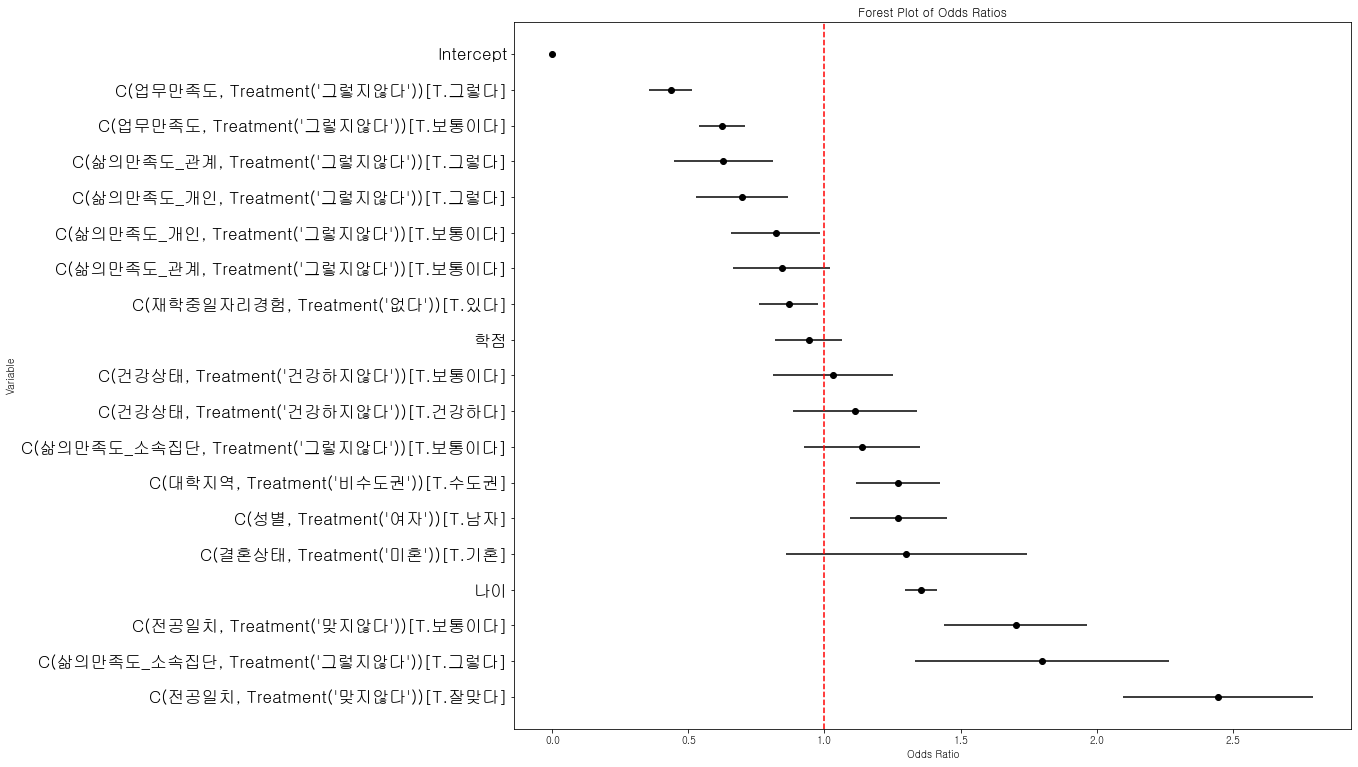

In [24]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(15, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Forest Plot of Odds Ratios')

# Show the plot
plt.show()

In [25]:
odds_ratios_3.index

Index(['Intercept', 'C(성별, Treatment('여자'))[T.남자]',
       'C(건강상태, Treatment('건강하지않다'))[T.건강하다]',
       'C(건강상태, Treatment('건강하지않다'))[T.보통이다]',
       'C(결혼상태, Treatment('미혼'))[T.기혼]', 'C(대학지역, Treatment('비수도권'))[T.수도권]',
       'C(전공일치, Treatment('맞지않다'))[T.보통이다]',
       'C(전공일치, Treatment('맞지않다'))[T.잘맞다]',
       'C(재학중일자리경험, Treatment('없다'))[T.있다]',
       'C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]',
       'C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]',
       'C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]',
       'C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]',
       'C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]',
       'C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]',
       'C(업무만족도, Treatment('그렇지않다'))[T.그렇다]',
       'C(업무만족도, Treatment('그렇지않다'))[T.보통이다]', '나이', '학점'],
      dtype='object')

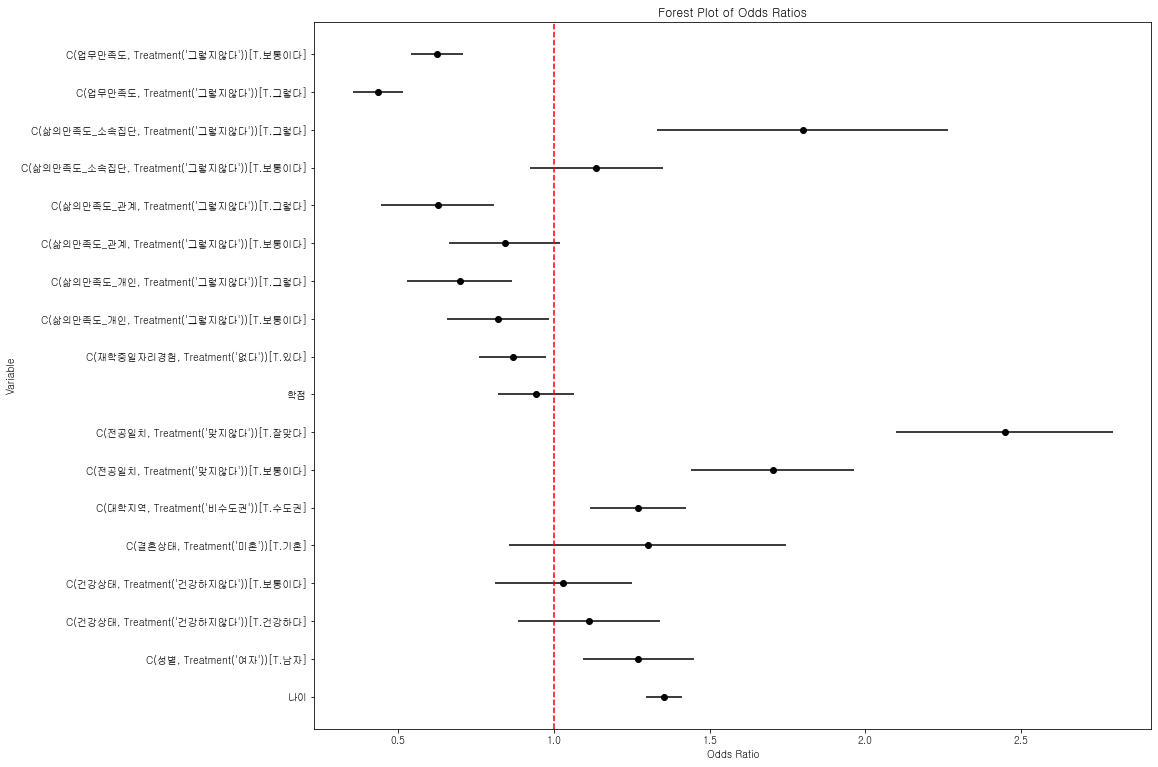

In [14]:
# 테이블 변수 순서대로

# Define the desired order of variables
var_order = ['나이',  "C(성별, Treatment('여자'))[T.남자]",
       "C(건강상태, Treatment('건강하지않다'))[T.건강하다]",
       "C(건강상태, Treatment('건강하지않다'))[T.보통이다]",
       "C(결혼상태, Treatment('미혼'))[T.기혼]", "C(대학지역, Treatment('비수도권'))[T.수도권]",
       "C(전공일치, Treatment('맞지않다'))[T.보통이다]",
       "C(전공일치, Treatment('맞지않다'))[T.잘맞다]", '학점', "C(재학중일자리경험, Treatment('없다'))[T.있다]",
        "C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]", "C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",
        "C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]","C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",
        "C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]","C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]",
        "C(업무만족도, Treatment('그렇지않다'))[T.그렇다]",
       "C(업무만족도, Treatment('그렇지않다'))[T.보통이다]"]

# Define the data in the desired order
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in var_order]

# Set the figure size
plt.figure(figsize=(15, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data])
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Forest Plot of Odds Ratios')

# Show the plot
plt.show()

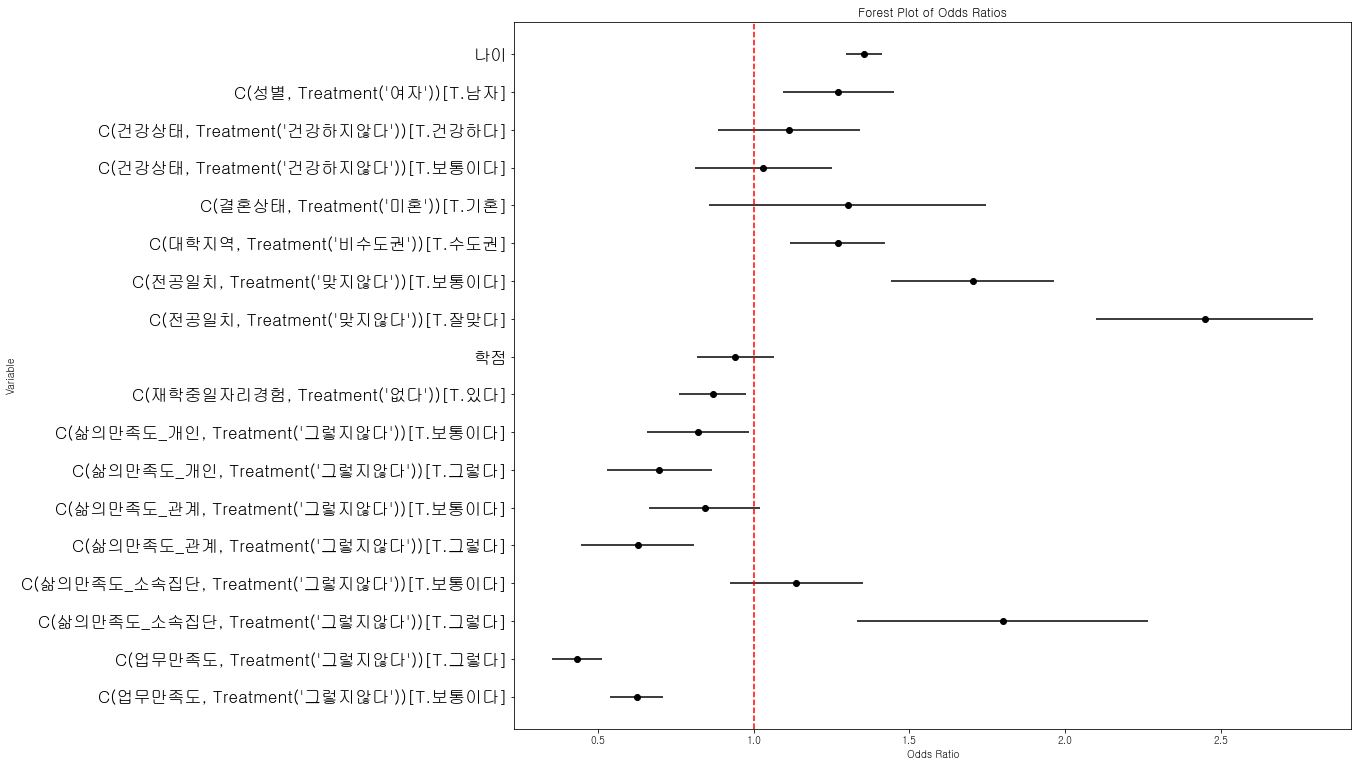

In [18]:
# 테이블 변수 순서대로

# Define the desired order of variables
var_order = ['나이',  "C(성별, Treatment('여자'))[T.남자]",
       "C(건강상태, Treatment('건강하지않다'))[T.건강하다]",
       "C(건강상태, Treatment('건강하지않다'))[T.보통이다]",
       "C(결혼상태, Treatment('미혼'))[T.기혼]", "C(대학지역, Treatment('비수도권'))[T.수도권]",
       "C(전공일치, Treatment('맞지않다'))[T.보통이다]",
       "C(전공일치, Treatment('맞지않다'))[T.잘맞다]", '학점', "C(재학중일자리경험, Treatment('없다'))[T.있다]",
        "C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]", "C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",
        "C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]","C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",
        "C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]","C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]",
        "C(업무만족도, Treatment('그렇지않다'))[T.그렇다]",
       "C(업무만족도, Treatment('그렇지않다'))[T.보통이다]"]

var_order_reversed = var_order[::-1] # 역순 정렬

# Define the data in the desired order
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in var_order_reversed]

# Set the figure size
plt.figure(figsize=(15, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Forest Plot of Odds Ratios')

# Show the plot
plt.show()